# BREAST CANCER NOTEBOOK
Breast Cancer: https://www.kaggle.com/c/184702-tu-ml-ws-18-breast-cancer/data
* Small # samples (285)
* Small # dimensions (32)
* Unknown # classes (2)

# Models # 
* [Decision Tree](https://scikit-learn.org/stable/modules/tree.html)
* [kNN](https://scikit-learn.org/stable/modules/neighbors.html)

# General
## Module Installs & Imports

In [26]:
from base import *
%run base.py
%matplotlib inline


# Kaggle: Breast Cancer
## Submissions to Kaggle
[Submissions](https://www.kaggle.com/c/184702-tu-ml-ws-18-breast-cancer/submissions?sortBy=date&group=all&page=1)

## Import data

In [27]:
# Paths
breast_l = mlpath + "Breast_Cancer/breast-cancer-diagnostic.shuf.lrn.csv"
breast_t = mlpath + "Breast_Cancer/breast-cancer-diagnostic.shuf.tes.csv"
breast_s = mlpath + "Breast_Cancer/breast-cancer-diagnostic.shuf.sol.ex.csv"
breast_resultsfolder = mlpath + "Breast_Cancer/results/"

# Read files
b_train = pd.read_csv(breast_l, sep=",")
b_test = pd.read_csv(breast_t, sep=",")
b_sol = pd.read_csv(breast_s, sep=",")

# Split data 
b_train_data = b_train.drop(["ID", "class"], axis = "columns") # All cols except ID and class)
b_train_target = b_train.loc[:, "class"] # Col class
b_test_data = b_test.drop(["ID"], axis = "columns") # All cols except ID)
b_test_target = b_sol.loc[:, "class"] # Col class

## Upload csv to drive (Breast cancer)

In [28]:
def upload_breast_csv(result, filename):
  # concat b_test column ID and knnresults column class
  b_result = pd.concat([b_test.iloc[:, 0], result], axis = 1)

  path = breast_resultsfolder + filename 
  print(path)
  b_result.to_csv(path, sep = ",", index = False)
  print(f"Saved as {filename}")

## KNN (Breast cancer)

In [29]:
# Parameters
scale = True
k = 11


### Test with range of parameters

In [30]:
if scale:
  b_train_data, b_test_data = scale_data(b_train_data, b_test_data)

for i in range(1, 16):
  run_knn(b_train_data, b_train_target, b_test_data, b_test_target, k = i, col_name = "class")


CV: 1
Accuracy: 0.972 (+/- 0.030), F1: 0.968 (+/- 0.035)
CV: 2
Accuracy: 0.958 (+/- 0.030), F1: 0.951 (+/- 0.036)
CV: 3
Accuracy: 0.968 (+/- 0.033), F1: 0.963 (+/- 0.039)
CV: 4
Accuracy: 0.965 (+/- 0.027), F1: 0.959 (+/- 0.032)
CV: 5
Accuracy: 0.976 (+/- 0.031), F1: 0.971 (+/- 0.037)
CV: 6
Accuracy: 0.976 (+/- 0.031), F1: 0.971 (+/- 0.037)
CV: 7
Accuracy: 0.983 (+/- 0.032), F1: 0.980 (+/- 0.038)
CV: 8
Accuracy: 0.972 (+/- 0.034), F1: 0.967 (+/- 0.040)
CV: 9
Accuracy: 0.983 (+/- 0.023), F1: 0.980 (+/- 0.027)
CV: 10
Accuracy: 0.983 (+/- 0.023), F1: 0.980 (+/- 0.027)
CV: 11
Accuracy: 0.983 (+/- 0.023), F1: 0.980 (+/- 0.027)
CV: 12
Accuracy: 0.983 (+/- 0.023), F1: 0.980 (+/- 0.027)
CV: 13
Accuracy: 0.983 (+/- 0.023), F1: 0.980 (+/- 0.027)
CV: 14
Accuracy: 0.972 (+/- 0.026), F1: 0.968 (+/- 0.030)
CV: 15
Accuracy: 0.979 (+/- 0.028), F1: 0.976 (+/- 0.032)


### Create and upload KNN result

In [31]:
# Preprocessing
if scale: 
  b_train_data, b_test_data = scale_data(b_train_data, b_test_data)
  
# Create
(knnresult, knn) = create_knn_result(b_train_data, b_train_target, b_test_data, b_test_target, k, col_name = "class")

# Upload
upload_breast_csv(knnresult, knn_filename(k, scale))


CV: 11
Accuracy: 0.983 (+/- 0.023), F1: 0.980 (+/- 0.027)
KNN 0.6549295774647887
[[186  98]
 [  0   0]]
./Breast_Cancer/results/knn_11_scaled_2019-04-22 12:30:14.429599.csv
Saved as knn_11_scaled_2019-04-22 12:30:14.429599.csv


## DTREE (Breast cancer)
### Test with range of parameters

In [32]:
criterions = ["gini", "entropy"]
max_tree_depth = [None, 1, 2, 3, 5, 8, 13, 20, 100, 500, 1000, 5000, 10000]
for crit in criterions:
  for depth in max_tree_depth:
    run_dtree(b_train_data, b_train_target, b_test_data, criterion=crit, max_depth=depth, post_prune = False, col_name = "class", skip_cv = False)
  print("\n")

CV: [Criterion] gini, [Max Tree Depth] None
Accuracy: 0.958 (+/- 0.030), F1: 0.952 (+/- 0.036)
CV: [Criterion] gini, [Max Tree Depth] 1
Accuracy: 0.940 (+/- 0.042), F1: 0.928 (+/- 0.051)
CV: [Criterion] gini, [Max Tree Depth] 2
Accuracy: 0.969 (+/- 0.036), F1: 0.964 (+/- 0.043)
CV: [Criterion] gini, [Max Tree Depth] 3
Accuracy: 0.969 (+/- 0.036), F1: 0.964 (+/- 0.043)
CV: [Criterion] gini, [Max Tree Depth] 5
Accuracy: 0.955 (+/- 0.049), F1: 0.949 (+/- 0.056)
CV: [Criterion] gini, [Max Tree Depth] 8
Accuracy: 0.955 (+/- 0.038), F1: 0.948 (+/- 0.045)
CV: [Criterion] gini, [Max Tree Depth] 13
Accuracy: 0.958 (+/- 0.040), F1: 0.952 (+/- 0.047)
CV: [Criterion] gini, [Max Tree Depth] 20
Accuracy: 0.958 (+/- 0.040), F1: 0.952 (+/- 0.047)
CV: [Criterion] gini, [Max Tree Depth] 100
Accuracy: 0.955 (+/- 0.041), F1: 0.948 (+/- 0.048)
CV: [Criterion] gini, [Max Tree Depth] 500
Accuracy: 0.961 (+/- 0.033), F1: 0.956 (+/- 0.039)
CV: [Criterion] gini, [Max Tree Depth] 1000
Accuracy: 0.961 (+/- 0.033)

### Create and upload DTREE result

DTREE  0.6161971830985915
[[175 109]
 [  0   0]]
./Breast_Cancer/results/dtree_entropy_None_2019-04-22 12:30:16.537300.csv
Saved as dtree_entropy_None_2019-04-22 12:30:16.537300.csv


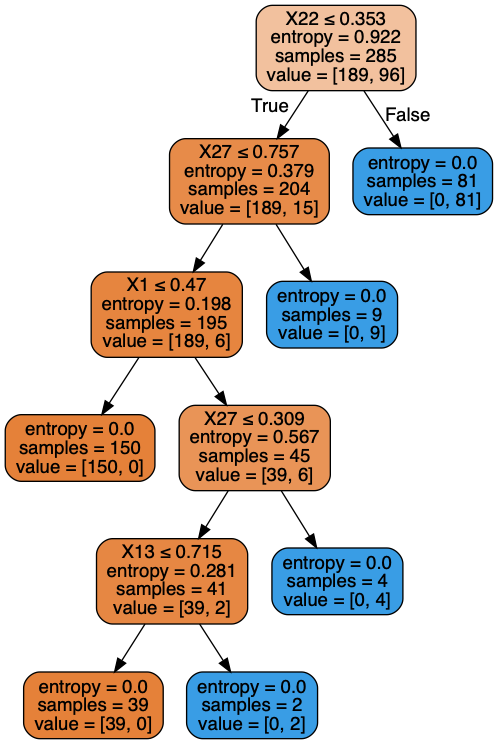

In [33]:
# Parameters
criterion = "entropy"
max_depth = None
post_prune = False

# Create
(dtreeresult, dtree_clf) = create_dtree_results(b_train_data, b_train_target, b_test_data, b_test_target, 
                                                criterion=criterion, max_depth=max_depth, post_prune=post_prune, 
                                                col_name = "class", skip_cv = True)

# Upload
upload_breast_csv(dtreeresult, dtree_filename(criterion, max_depth, post_prune))
plot_tree(dtree_clf)

